In [1]:
import networkx as nx
import numpy as np
from sklearn.cluster import KMeans 

In [2]:
def spectral_clustering(g : nx.Graph, k : int) -> list:
    """Computes spectral clustering of given graph.

    Args:
        network (nx.Graph): Input network to be clustered.
        k (int): Number of desired clusters.
    """
    laplacian = nx.laplacian_matrix(g)
    laplacian = laplacian.toarray()
    
    # Compute k eigenvectors of k smallest eigenvalues.
    eigvals, eigvecs = np.linalg.eigh(laplacian)
    eigvecs = eigvecs[:, :k]
    
    # Clusters rows of eigenvector matrix into k clusters.
    kmeans = KMeans(n_clusters=k, n_init='auto').fit(eigvecs)
    clusters = kmeans.labels_
    clusters = clusters.tolist()
    
    return clusters
    

[0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


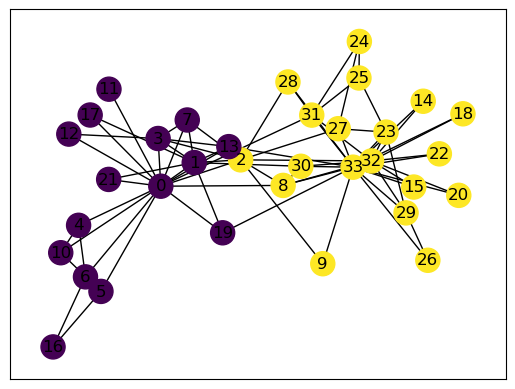

In [3]:
graph = nx.karate_club_graph()
clusters = spectral_clustering(graph, 2)

print(clusters)
nx.draw_networkx(graph, node_color=clusters)
